In this tutorial we will be illustrating how to apply Hirarchical clustering algorithm to a dataset.We here have a data of customers who buy things at a mall.In the data set there are information like Sex,Age,Income and Spending Score.We will immplement Hierarchical clustering on the data and then see what conclusion we can arrive at.This is a work in process and I will be updating the kernel in the coming days.If you like my work please do vote.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/k-means-mall-custome-data/Mall_Customers_1.csv


**Importing the Python modules**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import warnings 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

**Importing the dataset**

In [3]:
df=pd.read_csv('../input/k-means-mall-custome-data/Mall_Customers_1.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,18,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Creating the matrix of Features**

In [4]:
X=df.iloc[:,[3,4]].values

**Dendogram to find optimal number of clusters**

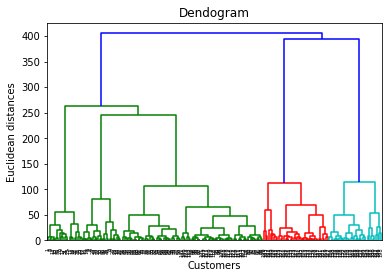

In [5]:
import scipy.cluster.hierarchy as sch
dendogram=sch.dendrogram(sch.linkage(X,method='ward')) # Within cluster variance is reduced with ward method
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

We have to look at the longest vertical line which is not intercepted by a horizontal line.After we find out the longest vertical line we have to split it horizontally.All the clusters below the split will be our optimium number of clusters.In the above case 3rd line from left is the longest uninterupted line.If we were to split it with a horizontal line we will get five clusters below it.So five will be the optimium number of clusters for our dataset.

**Fitting Hierarchical clustering to data**

In [6]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(X)

**Visualizing the cluster**

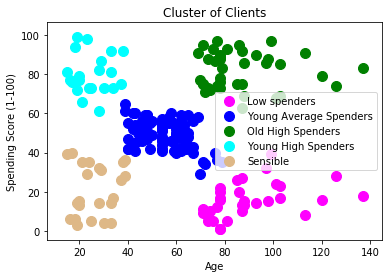

In [7]:
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='magenta',label='Low spenders ')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='blue',label='Young Average Spenders')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c='green',label='Old High Spenders')
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=100,c='cyan',label='Young High Spenders')
plt.scatter(X[y_hc==4,0],X[y_hc==4,1],s=100,c='burlywood',label='Sensible')
#plt.scatter(X[y_kmeans==5,0],X[y_kmeans==5,1],s=100,c='blue',label='Sensible')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='red',label='Centroids')
plt.title('Cluster of Clients')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.ioff()
plt.show()

Based on the above clusters we can do targetted marketing and increase our sales